# Part 1

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import pandas_datareader as web
import datetime
start = pd.to_datetime('2021-01-01')
end= datetime.date.today()

In [63]:
reliance=web.DataReader('RELIANCE.NS','yahoo',start,end)
hdfc=web.DataReader('HDFC.NS','yahoo',start,end)
adanipow=web.DataReader('ADANIPOWER.NS','yahoo',start,end)
Adanient=web.DataReader('ADANIENT.NS','yahoo',start,end)

In [64]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2021-01-01 to 2021-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       137 non-null    float64
 1   Low        137 non-null    float64
 2   Open       137 non-null    float64
 3   Close      137 non-null    float64
 4   Volume     137 non-null    float64
 5   Adj Close  137 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [65]:
stocks=pd.concat([reliance['Close'],hdfc['Close'],adanipow['Close'],Adanient['Close']],axis=1)

In [66]:
stocks.columns=['Reliance','HDFC','Adani Power','Adani Enterprises']

In [67]:
stocks.pct_change(1).mean()*100

Reliance             0.056892
HDFC                -0.007690
Adani Power          0.527025
Adani Enterprises    0.806657
dtype: float64

In [68]:
 stock_logreturn = np.log(stocks/stocks.shift(21))

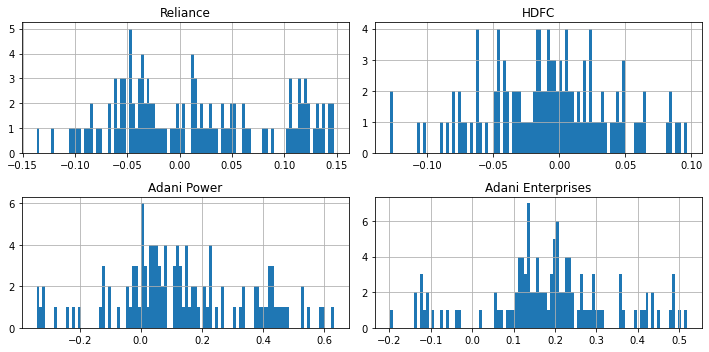

In [69]:
stock_logreturn.hist(bins=100,figsize=(10,5))
plt.tight_layout()

# Part 3

In [72]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    exp_ret=np.sum(stock_logreturn.mean()*weights)*252
    exp_vol=np.sqrt(np.dot(weights.transpose(),np.dot(stock_logreturn.cov()*252,weights)))
    sr=exp_ret/exp_vol
    return np.array([exp_ret,exp_vol,sr])

In [71]:
from scipy.optimize import minimize

In [73]:
def neg_sharpe_ratio(weights):
    return 1/get_ret_vol_sr(weights)[2]

In [74]:
def check_sum(weights):
    return np.sum(weights)-1

In [75]:
cons=({'type':'eq','fun':check_sum})

In [76]:
bounds=((0,1),(0,1),(0,1),(0,1))

In [77]:
init_guess=[0.25,0.25,0.25,0.25]

In [78]:
opt_result=minimize(neg_sharpe_ratio,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [79]:
opt_result.x

array([3.44776291e-17, 7.62420923e-17, 4.11310842e-02, 9.58868916e-01])

In [80]:
get_ret_vol_sr(opt_result.x)

array([46.09323583,  2.40591119, 19.15832802])